# Chapter 15: Machine learning

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Built in datasets

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
data1 = load_boston()

C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [3]:
print(type(data1))
print(np.shape(data1.data))

<class 'sklearn.utils._bunch.Bunch'>
(506, 13)


In [4]:
df = pd.DataFrame(data1.data, columns=data1.feature_names)
df['target'] = data1.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
datasets.fetch_california_housing

<function sklearn.datasets._california_housing.fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)>

In [6]:
datasets.make_regression

<function sklearn.datasets._samples_generator.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)>

# Regression

In [7]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) #, noise=2.5)

In [95]:
print(X_all)
print(np.shape(X_all))

print(y_all)
print(np.shape(y_all))

[[ 0.36754463 -0.82413381 -0.4784711  ...  1.92083154  0.28818357
   3.57123427]
 [-0.85090554 -2.01012768 -2.86505931 ...  0.96914909 -0.45305532
   0.59612384]
 [-0.65639685 -1.59535402 -0.22021729 ... -1.53017151  1.03263681
   0.21154223]
 ...
 [ 0.25921472 -1.02397004 -0.34654818 ... -0.56761583 -0.36163193
   0.28448657]
 [-0.42435355 -1.26624623 -0.08368643 ... -0.03292511  0.21299815
   1.59788532]
 [ 0.32127285  0.49156707 -0.2428986  ... -0.3924054  -1.64419212
   1.68636591]]
(50, 50)
[ -58.77754017 -192.15276861  -88.86215078 -164.55386053 -105.59997199
 -218.59729135   57.58561808   73.47741003  135.12042102 -184.18246747
   16.20080287  -42.14916405    5.71636116  129.30548128  105.27108181
 -563.23438274 -199.81051155  223.18328888  187.65150986    1.09103053
  304.87887178   -8.23488353  -86.27414019 -165.12716258   43.39359378
  286.86471877 -201.70396702   -7.208534    -82.45351657 -274.73793219
 -288.79960649  -23.46553406  101.99806926  188.50414228  -34.69645721
  

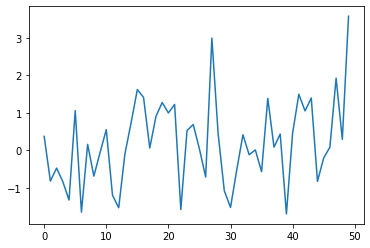

In [91]:
plt.plot(X_all[0])

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [11]:
X_train.shape, y_train.shape

((25, 50), (25,))

In [12]:
X_test.shape, y_test.shape

((25, 50), (25,))

In [13]:
model = linear_model.LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
#표본이 적어 과접합 될 수 있어 ㅈㅔ곱오차합으로 계산

def sse(resid):
    return sum(resid**2)

In [16]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.7896287822461127e-24

In [17]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_train)
sse_test

#매우 큰값으로 적절하지 않음을 알 수 있음

1.7896287822461127e-24

In [18]:
model.score(X_train, y_train)

1.0

In [19]:
model.score(X_test, y_test)

0.42220810228124805

In [20]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

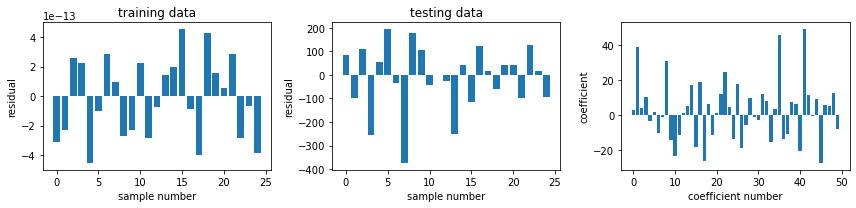

In [21]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [22]:
#리지 회귀분석 : 정규화 강도를 결종하는 알파값 설정가능, 

model = linear_model.Ridge(alpha=2.5) #alpha=2.5)

In [23]:
model.fit(X_train, y_train)

Ridge(alpha=2.5)

In [24]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

2112.8990187163186

In [25]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

472806.328020379

In [26]:
model.score(X_train, y_train), model.score(X_test, y_test)



(0.9974819648271182, 0.4016585871846101)

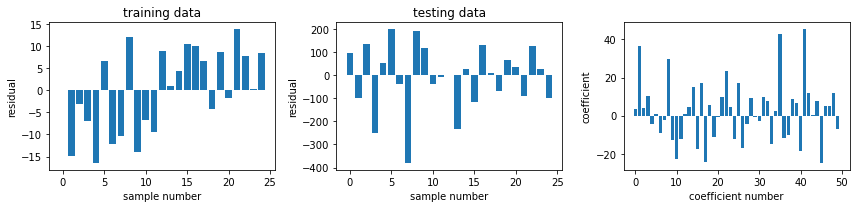

In [27]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-ridge.pdf")

In [28]:
# 라소 회귀 

model = linear_model.Lasso(alpha=1.0)

In [29]:
model.fit(X_train, y_train)

Lasso()

In [30]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

635.5662706026907

In [31]:
# 위 두개와 비교할 때 훈련 데이터는 sse 증가, 테스트 데이터 SSE 감소

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

178021.0105038558

In [32]:
#알파값은 경험적으로 적절한 값을 설정해야함

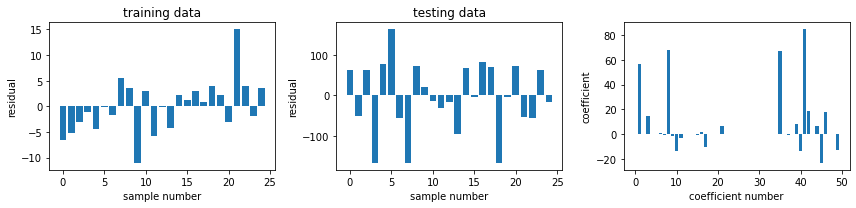

In [33]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso.pdf")

In [34]:
#알파값의 범위가 수십배씩 차이나게 설정

alphas = np.logspace(-4, 2, 100)

In [35]:
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)


#알파값을 바꿔가면 라소회귀 수행
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.716e+01, tolerance: 8.391e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.980e+01, tolerance: 8.391e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

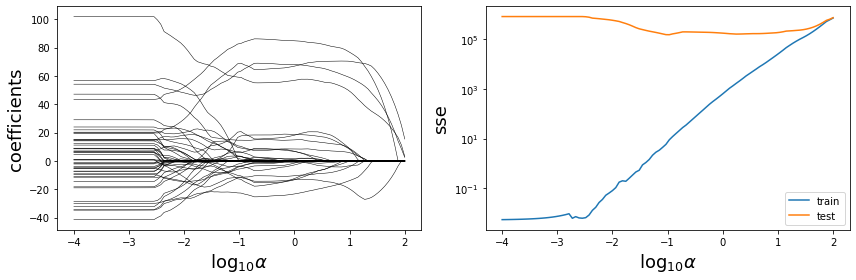

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()
fig.savefig("ch15-regression-lasso-vs-alpha.pdf")

In [37]:
# 알파값이 매우 작을때 많은 계수가 0이 아님 -> 과접합 의미
# 알파값이 특정 값 이상부터 많은 계수들이 0에 수렴

# 알파값이 증가함에 따라 훈련세트는 sse가 꾸준히 증가
# 테스트세트에서는 어느 시점에서 급격한 감소가 보임

In [38]:
# 알파값 자동 선택 라소회귀

model = linear_model.LassoCV()

In [39]:
model.fit(X_all, y_all)

LassoCV()

In [40]:
model.alpha_

0.15270922090800848

In [41]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

8.390996211437491

In [42]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

8.078755871255712

In [43]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9999900000788449, 0.9999897762489305)

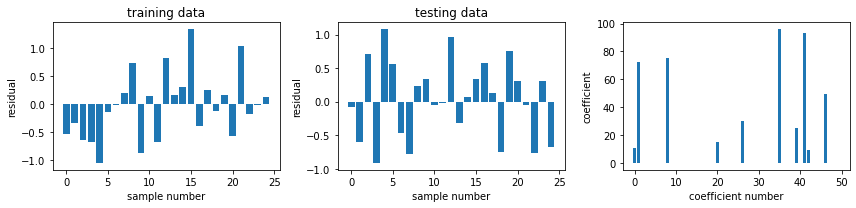

In [44]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso-cv.pdf")

In [45]:
#일레스틱넷 : 라소와 리지의 L1, L2 정규화를 결합한 다른 형태의 정규화 회귀
# p(l1 ratio)는 l1 과 ㅣ2 패널티의 상대적 가중값을 결정(엘라스틱넷의 작동을 라소와 리지중 어느것에 가깝게 할지 설정)
#ElasticNetCV는 알파와 l1 ratio 를 명시하지 않고 자동으로 찾는 교차검증 버전임

model = linear_model.ElasticNetCV()

In [46]:
model.fit(X_all, y_all)

ElasticNetCV()

In [47]:
model.alpha_

0.305418441816017

In [48]:
model.l1_ratio

# 0.5 라소회귀 리소회귀 두개의 특성을 모두 가지고있음

0.5

In [49]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

16988.899930432573

In [50]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

19162.674676363193

In [51]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9797535768655008, 0.9757494323580994)

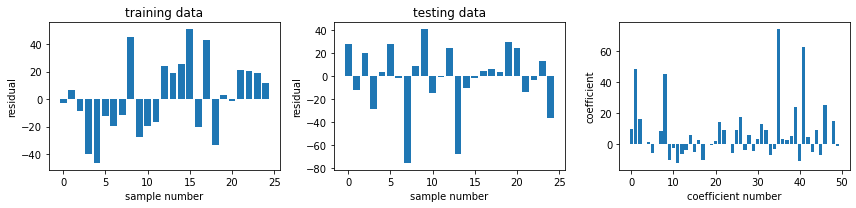

In [52]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-elastic-net-cv.pdf")

# Classification

In [53]:
iris = datasets.load_iris()

In [54]:
type(iris)

sklearn.utils._bunch.Bunch

In [55]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
iris.data.shape

(150, 4)

In [58]:
iris.target.shape

(150,)

In [59]:
# print(iris['DESCR'])

In [60]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [61]:
print(np.shape(X_train))
print(np.shape(X_test))

(105, 4)
(45, 4)


In [62]:
#로지스틱 회귀 분류

classifier = linear_model.LogisticRegression()

In [63]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_test_pred = classifier.predict(X_test)

In [65]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      1.00      0.84         8
           2       1.00      0.87      0.93        23

    accuracy                           0.93        45
   macro avg       0.91      0.96      0.92        45
weighted avg       0.95      0.93      0.94        45



In [66]:
#라벨 별 갯수 카운트
np.bincount(y_test)

array([14,  8, 23], dtype=int64)

In [67]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  3, 20]], dtype=int64)

In [68]:
#DecisionTreeClassifier


classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 21]], dtype=int64)

In [69]:
#KNN

classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 22]], dtype=int64)

In [70]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  4, 19]], dtype=int64)

In [71]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  3, 20]], dtype=int64)

In [72]:
#테스트 세트 사이즈 변경시키면서 확인

train_size_vec = np.linspace(0.1, 0.9, 30)

In [73]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [74]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [75]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

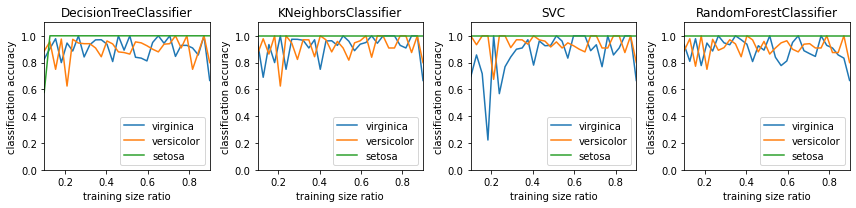

In [76]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()
fig.savefig("ch15-classification-comparison.pdf")

# Clustering : 비지도학습


In [77]:
X, y = iris.data, iris.target

In [78]:
np.random.seed(123)

In [79]:
n_clusters = 3

In [80]:
c = cluster.KMeans(n_clusters=n_clusters)

In [81]:
c.fit(X)

C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [82]:
y_pred = c.predict(X)

In [83]:
y_pred[::8] #8번째 요소까지만출력

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [84]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [85]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))

In [86]:
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1

In [87]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [88]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

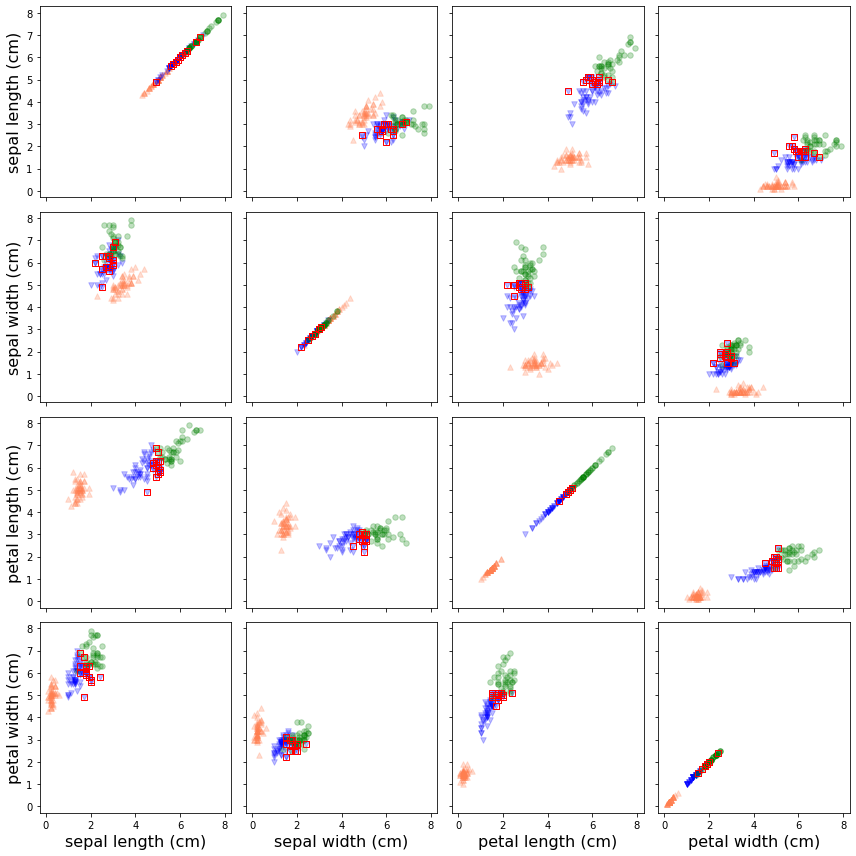

In [89]:
#일치하지 않는 각 표본 주위에 빨간 사각형

N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()
fig.savefig("ch15-clustering.pdf")

In [ ]:
# https://losskatsu.github.io/machine-learning/sklearn/#